In [931]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

def plot_results(ax, standard, fixedpoint, fixed_bit, minifloat, float_bit, first_tile=False, last_tile=False, legend=False):
    # Convert lists to numpy arrays for easier calculations
    standard = np.array(standard)
    fixedpoint = np.array(fixedpoint)
    minifloat = np.array(minifloat)

    # Calculate means and standard deviations
    mean_standard = np.mean(standard, axis=0)
    std_standard = np.std(standard, axis=0)

    mean_fixedpoint = np.mean(fixedpoint, axis=0)
    error_fixedpoint = (mean_fixedpoint / mean_standard) * 100
    std_fixedpoint = np.std(fixedpoint, axis=0)

    total_bit = [fb[0] for fb in fixed_bit]
    fractional_bit = [fb[1] for fb in fixed_bit]

    mean_minifloat = np.mean(minifloat, axis=0)
    error_minifloat = (mean_minifloat / mean_standard) * 100
    std_minifloat = np.std(minifloat, axis=0)

    exponent = [mb[0] for mb in float_bit]
    mantissa = [mb[1] for mb in float_bit]

    # X-axis values for plotting
    x_fixedpoint = np.array(total_bit)
    x_minifloat = np.array(exponent) + np.array(mantissa) + 1.0
    x_ticks = np.unique(np.concatenate((x_fixedpoint, x_minifloat)))

    # Generate new x_fixedpoint and x_minifloat to align with midpoints
    midpoints = (x_ticks[:-1] + x_ticks[1:]) / 2
    new_x_fixedpoint = np.interp(x_fixedpoint, x_ticks, np.concatenate(([x_ticks[0]/2], midpoints)))
    new_x_minifloat = np.interp(x_minifloat, x_ticks, np.concatenate(([x_ticks[0]/2], midpoints)))

    prop_minifloat = 0.33
    prop_fixedpoint = -0.33
    new_x_fixedpoint = np.interp(x_fixedpoint, x_ticks, np.concatenate(([x_ticks[0]/2 + prop_fixedpoint * (x_ticks[1] - x_ticks[0])], midpoints + prop_fixedpoint * (x_ticks[1:] - midpoints))))
    new_x_minifloat = np.interp(x_minifloat, x_ticks, np.concatenate(([x_ticks[0]/2 + prop_minifloat * (x_ticks[1] - x_ticks[0])], midpoints + prop_minifloat * (x_ticks[1:] - midpoints))))

    new_x_fixedpoint[1] -= 0.5
    new_x_minifloat[2] -= 0.66
    new_x_minifloat[3] += 0.66

    # Plot torch accuracy + std
    ax.axhline(y=mean_standard, color='k', linestyle='-', label='Torch accuracy')
    ax.axhline(y=mean_standard+std_standard, color='k', linestyle='--')
    ax.axhline(y=mean_standard-std_standard, color='k', linestyle='--')

    # Plot fixed-point and minifloat accuracy with error bars
    ax.errorbar(new_x_fixedpoint, mean_fixedpoint, yerr=std_fixedpoint, capsize=3, color='b', fmt='-o', label='Fixed-Point')
    ax.errorbar(new_x_minifloat, mean_minifloat, yerr=std_minifloat, capsize=3, color='r', fmt='-o', label='Minifloat')


    #ax.set_xlabel('# bits')
    ax.set_xticks(x_ticks)#[:-1] + (x_ticks[1:] - x_ticks[:-1]) / 2)
    ax.xaxis.set_visible(True)
    ax.set_xticklabels([])
    ax.tick_params(length=0)
    #ax.xaxis.set_major_locator(plt.NullLocator())
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if legend:
        ax.legend()
    ax.set_ylim(0, 110)
    ax.grid(True)
    ax.invert_xaxis()

    # Create twin axes for additional x-labels
    ax_bottom = ax.twiny()
    ax_bottom.set_xlim(ax.get_xlim())
    ax_bottom.set_xticks(new_x_fixedpoint)    
    ax_bottom.set_xticklabels([str(tb) + '\n' + str(fb) for tb, fb in zip(total_bit, fractional_bit)])
    #ax_bottom.set_xlabel('Fixed point', color='blue')
    ax_bottom.xaxis.set_label_position('bottom')
    ax_bottom.xaxis.set_ticks_position('bottom')
    ax_bottom.xaxis.label.set_color('blue')
    ax_bottom.spines['bottom'].set_position(('outward', 0))
    ax_bottom.spines['bottom'].set_edgecolor('blue')
    ax_bottom.spines['bottom'].set_color('blue')
    ax_bottom.spines['top'].set_visible(False)
    ax_bottom.tick_params(axis='x', colors='blue', direction='in')

    # Create another twin axes for the second x-label
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(new_x_minifloat)
    ax_top.set_xticklabels([str(eb) + '\n' + str(mb) for eb, mb in zip(exponent, mantissa)])
    #ax_top.set_xlabel('Minifloat', color='red')
    ax_top.xaxis.set_label_position('top')
    ax_top.xaxis.set_ticks_position('top')
    ax_top.xaxis.label.set_color('red')
    ax_top.spines['top'].set_position(('outward', 0))
    ax_top.spines['top'].set_edgecolor('red')
    ax_top.spines['top'].set_color('red')
    ax_top.spines['bottom'].set_visible(False)
    ax_top.tick_params(axis='x', colors='red', direction='in')

    # Add labels and decorations
    if first_tile:
        ax.text(33, 0.94, 'Minifloat:\nExponent\nMantissa\n', transform=ax.get_xaxis_transform(), 
                ha='left', va='bottom', rotation='horizontal', color='red')
        ax.text(33, 0.065, 'Fixed-point:\nTotal bits\nFractional', transform=ax.get_xaxis_transform(), 
                ha='left', va='top', rotation='horizontal', color='blue')
    
    if last_tile:
        ax.set_ylabel('Accuracy (%)')
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
    else:
        ax.set_yticklabels([])

    return ax

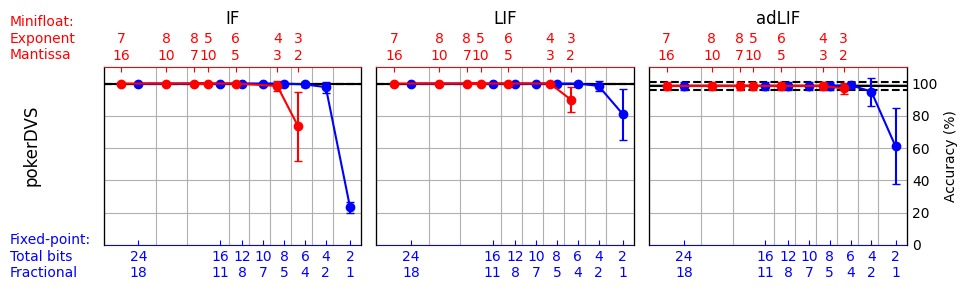

In [ ]:
## pokerDVS

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
fig.supylabel('pokerDVS', x=0.05)

# IF
import results.pokerDVS_IF_2450_35_4 as current_results
reload(current_results)

sub_ax = plot_results(ax[0], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits,
                      first_tile=True)
sub_ax.set_title("IF")

# LIF
import results.pokerDVS_LIF_2450_35_4 as current_results
reload(current_results)

sub_ax = plot_results(ax[1], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits)
sub_ax.set_title("LIF")

# adLIF
import results.pokerDVS_adLIF_2450_35_4 as current_results
reload(current_results)

sub_ax = plot_results(ax[2], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits,
                      last_tile=True)
sub_ax.set_title("adLIF")

plt.tight_layout()
plt.savefig("results/pokerDVS_results.png")
plt.show()

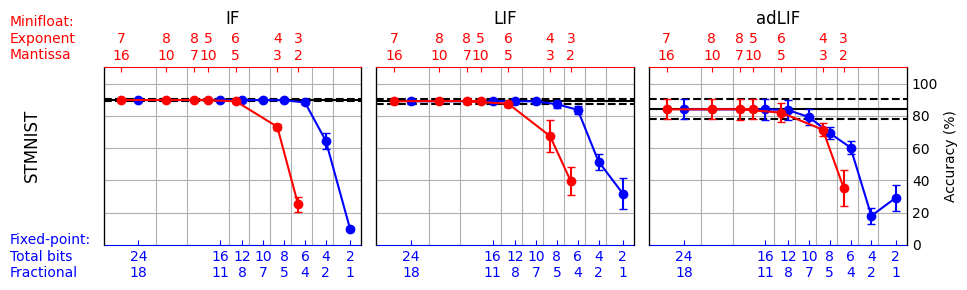

In [ ]:
## STMNIST

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
fig.supylabel('STMNIST', x=0.05)

# IF
import results.STMNIST_IF_200_70_10 as current_results
reload(current_results)

sub_ax = plot_results(ax[0], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits, first_tile=True)

# LIF
import results.STMNIST_LIF_200_70_10 as current_results
reload(current_results)

sub_ax = plot_results(ax[1], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits)

# adLIF
import results.STMNIST_adLIF_200_70_10 as current_results
reload(current_results)

sub_ax = plot_results(ax[2], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits, last_tile=True)

plt.tight_layout()
plt.savefig("results/STMNIST_results.png")
plt.show()

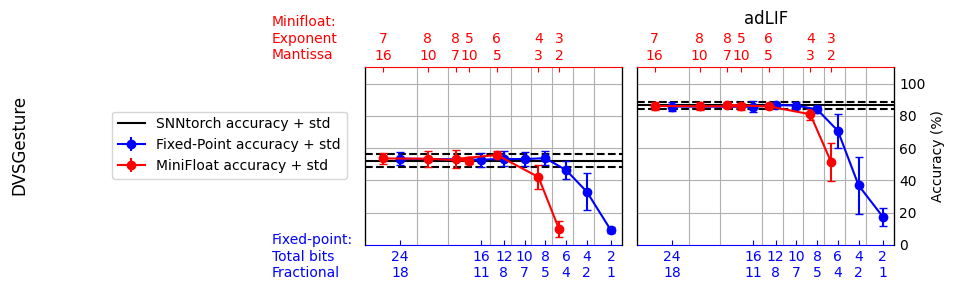

In [937]:
## DVSGesture

fig, ax = plt.subplots(1, 3, figsize=(10, 3), gridspec_kw={'width_ratios': [4, 3, 3]})
fig.supylabel('DVSGesture', x=0.05)

# Empty boxes
axl, = ax[0].plot([], [], 'k-', label="SNNtorch accuracy + std")
eb1 = ax[0].errorbar([], [], yerr=[], capsize=3, color='b', fmt='-o', label='Fixed-Point accuracy + std')
eb2 = ax[0].errorbar([], [], yerr=[], capsize=3, color='r', fmt='-o', label='MiniFloat accuracy + std')
ax[0].set_visible(False)

txt = fig.text(0.77, 0.94, 'Minifloat:\nExponent\nMantissa\n', transform=ax[0].get_xaxis_transform(), 
        ha='left', va='bottom', rotation='horizontal', color='red')
txt = fig.text(0.77, 0.065, 'Fixed-point:\nTotal bits\nFractional', transform=ax[0].get_xaxis_transform(), 
        ha='left', va='top', rotation='horizontal', color='blue')

fig.legend(handles=[axl, eb1, eb2], loc='center left', bbox_to_anchor=(0.145, 0.5))

# LIF
import results.DVSGesture_LIF_8192_512_64_11 as current_results
reload(current_results)

sub_ax = plot_results(ax[1], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits)


# adLIF
import results.DVSGesture_adLIF_8192_512_64_11 as current_results
reload(current_results)

sub_ax = plot_results(ax[2], current_results.standard,
                      current_results.fixedpoint, current_results.fixedpoint_bits,
                      current_results.minifloat, current_results.minifloat_bits,
                      last_tile=True)
sub_ax.set_title("adLIF")

plt.tight_layout()
plt.savefig("results/DVSGesture_results.png")
plt.show()